In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style='darkgrid')

In [107]:
# data files
df_crashes = pd.read_csv('Crash_Data.csv', low_memory=False)
df=df_crashes
df_crashes.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [108]:
list(df.columns)

['Crash ID',
 'State',
 'Month',
 'Year',
 'Dayweek',
 'Time',
 'Crash Type',
 'Bus Involvement',
 'Heavy Rigid Truck Involvement',
 'Articulated Truck Involvement',
 'Speed Limit',
 'Road User',
 'Gender',
 'Age',
 'National Remoteness Areas',
 'SA4 Name 2016',
 'National LGA Name 2017',
 'National Road Type',
 'Christmas Period',
 'Easter Period',
 'Age Group',
 'Day of week',
 'Time of day']

In [109]:
list(df.State.unique())

['Vic', 'SA', 'Qld', 'WA', 'NSW', 'NT', 'ACT', 'Tas']

In [110]:
df.isnull().sum().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [111]:
df.drop(['National LGA Name 2017','Bus Involvement','National Road Type'],axis=1 ,inplace=True)
df_crashes.head()


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,Passenger,Male,19,Inner Regional Australia,Hume,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,Driver,Male,23,Outer Regional Australia,Hume,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,No,No,40_to_64,Weekend,Night


In [101]:
#State wise Crash percentage
# Labels for the sections of our pie chart
labels = ["Vic", "NSW", "SA", "QLD", "ACT", "NT", "WA", "Tas"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100, 120, 110, 200, 210]


colors = ["red", "orange", "lightcoral", "lightskyblue", "grey", "plum", "palegreen", "navy"]


explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

Text(0.5, 1.0, 'Primary Contributing Cause of Reported Crashes (1989 - 2021)')

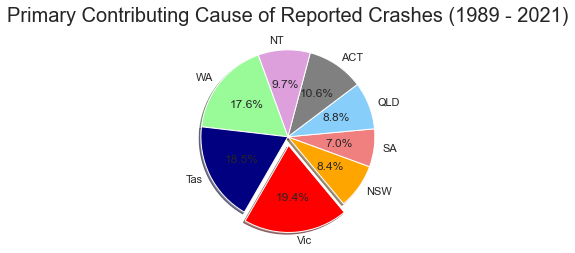

In [94]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title('Primary Contributing Cause of Reported Crashes (1989 - 2021)', fontsize=20)

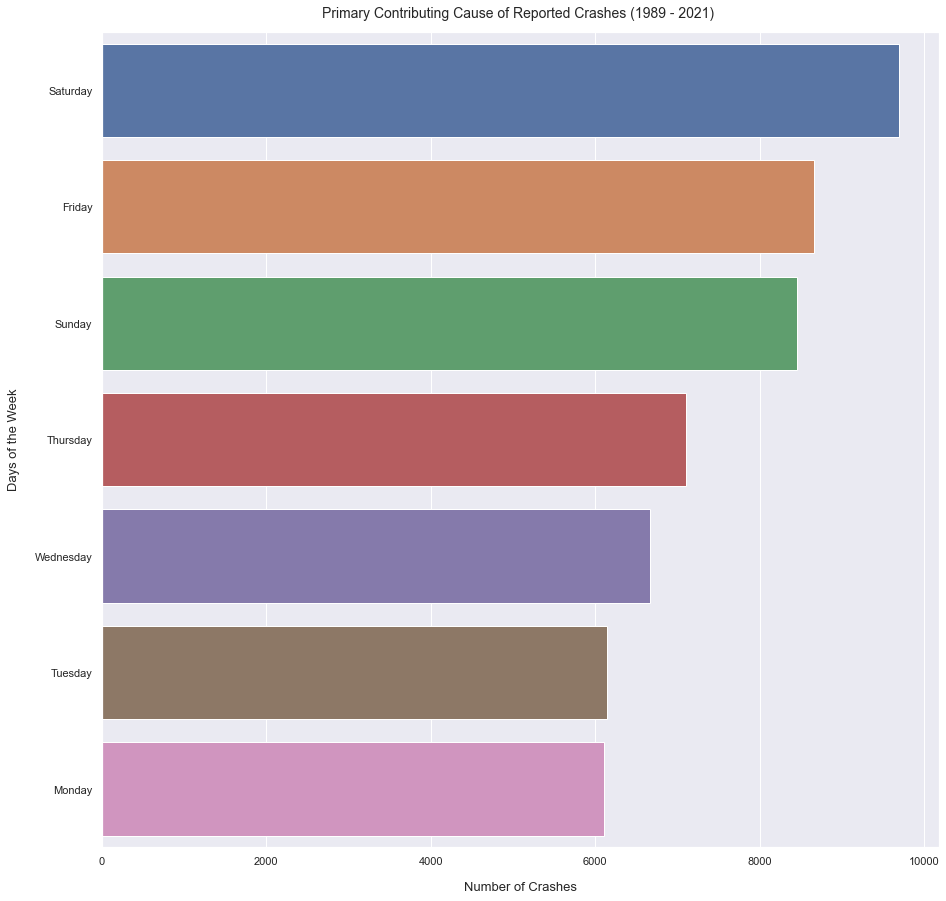

In [117]:
#Plot the reported crashes, from highest to lowest.
plt.figure(figsize=(15, 15))
sns.countplot(data=df_crashes,  y='Dayweek', order = df_crashes['Dayweek'].value_counts().index)
plt.title('Primary Contributing Cause of Reported Crashes (1989 - 2021) ', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Days of the Week', fontsize=13, labelpad=15)
plt.savefig("Primary Contributing Cause.png", bbox_inches = "tight")
plt.show();